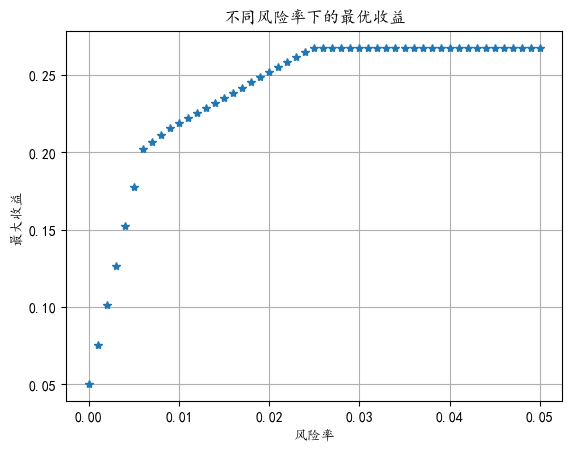

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False

# a：不同风险率，从 0 到 0.05，步长 0.001（包含 0.05）
a = np.arange(0, 0.0500001, 0.001)

# 目标函数系数向量（MATLAB 中用负号把“最大化”转为“最小化”）
c = np.array([-0.05, -0.27, -0.19, -0.185, -0.185], dtype=float)

# 不等式约束 A_ub x <= b_ub
# A = [zeros(4,1), diag([0.025, 0.015, 0.055, 0.026])]
A_ub = np.hstack([
    np.zeros((4, 1)),                         # 对 x0 无约束系数
    np.diag([0.025, 0.015, 0.055, 0.026])     # 对 x1..x4 的系数（注意：这里仍然是 5 个变量，总列数=5）
])

# 等式约束 A_eq x = b_eq
A_eq = np.array([[1, 1.01, 1.02, 1.045, 1.065]], dtype=float)
b_eq = np.array([1.0], dtype=float)

# 变量下界（均为 0），无上界
bounds = [(0, None) for _ in range(5)]

Q = np.zeros_like(a, dtype=float)  # 存放不同风险率下的最优“最大收益”
XX = []                             # 存放各风险率的最优解 x*

for i, ai in enumerate(a):
    b_ub = ai * np.ones(4)  # 每个不等式的常数项都等于当前风险率 ai

    res = linprog(
        c=c,
        A_ub=A_ub, b_ub=b_ub,
        A_eq=A_eq, b_eq=b_eq,
        bounds=bounds,
        method="highs"
    )

    if not res.success:
        # 若不可行或求解失败，按需要处理（这里设为 NaN 并继续）
        Q[i] = np.nan
        XX.append([np.nan]*5)
        continue

    # MATLAB 里 Q(i) = -y；linprog 返回的是最小值 c^T x，
    # 因为 c 本来就带负号，所以最大收益 = -res.fun
    Q[i] = -res.fun
    XX.append(res.x.tolist())

XX = np.array(XX)  # 形状：(len(a), 5)

# 绘图
plt.figure()
plt.plot(a, Q, '*')
plt.xlabel('风险率')
plt.ylabel('最大收益')
plt.title('不同风险率下的最优收益')
plt.grid(True)
plt.show()
